# ASSESMENT -3

#### 21BCE0516
#### ANUSHKA
##### anushka.2021a@vitstudent.ac.in

1. Download the dataset

2. Load the dataset into the tool

In [15]:
import pandas as pd
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3. Perform the Below Visualizations. ￿ Univariate Analysis ￿ Bi - Variate Analysis ￿ Multivariate
Analysis

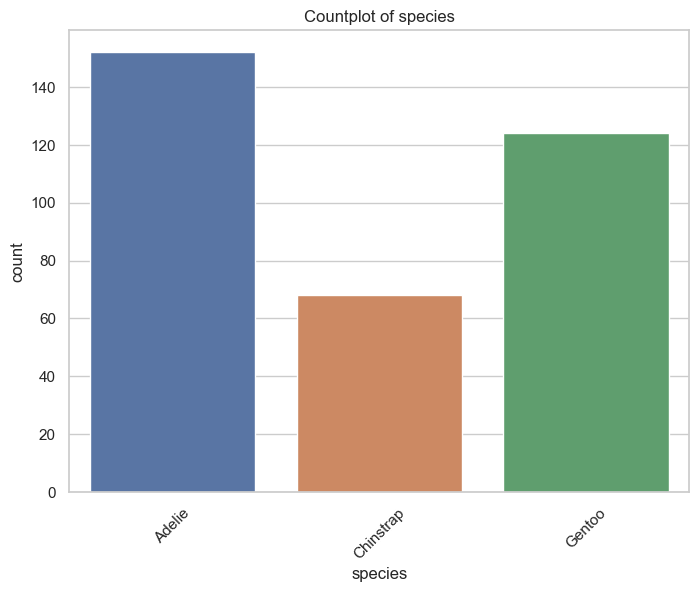

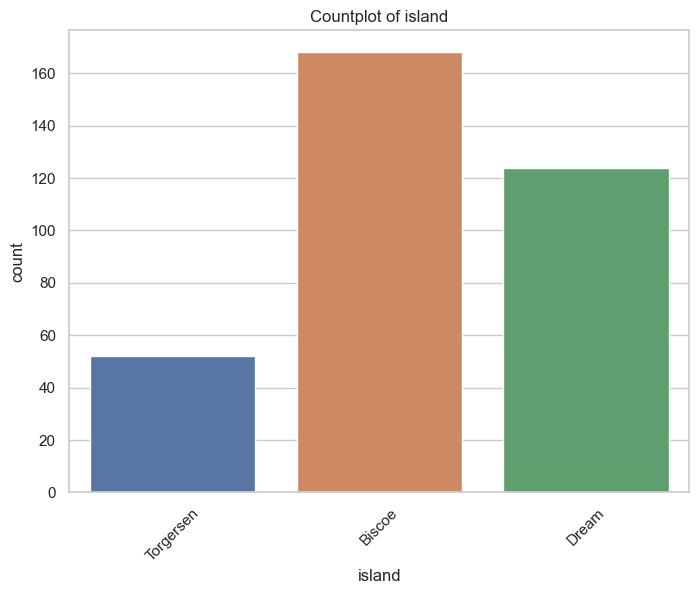

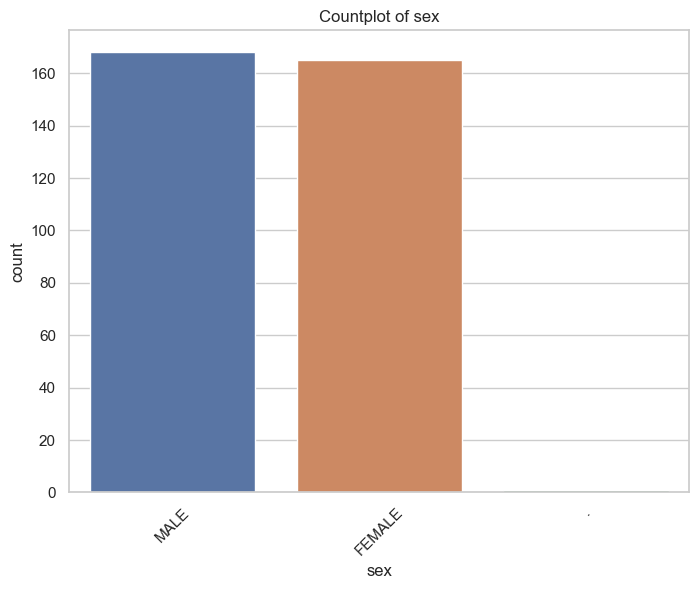

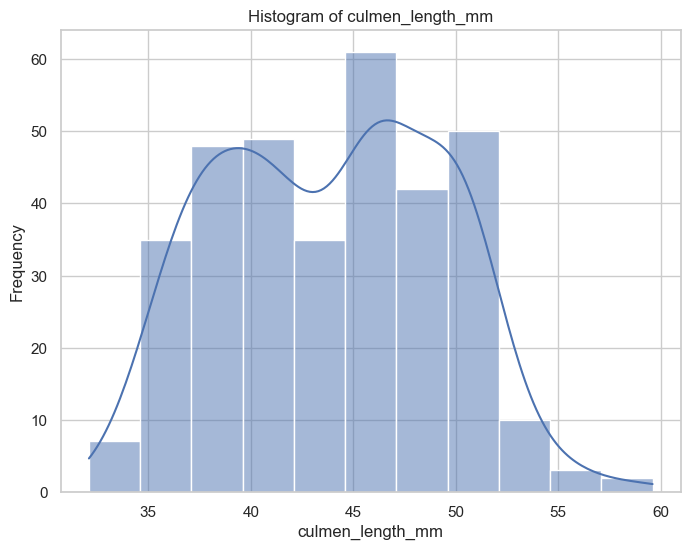

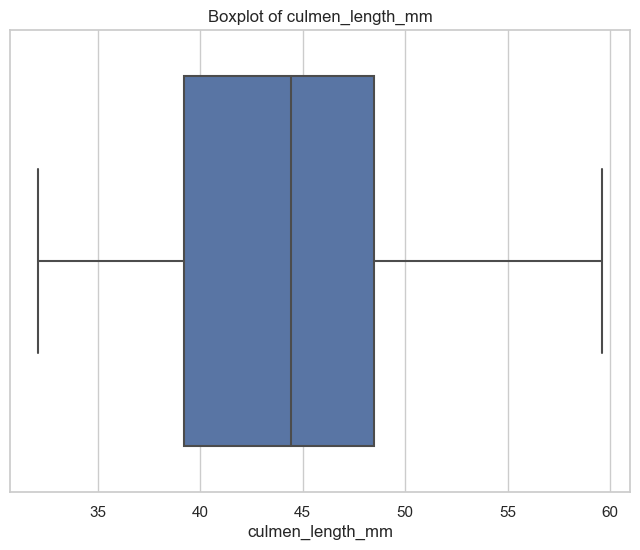

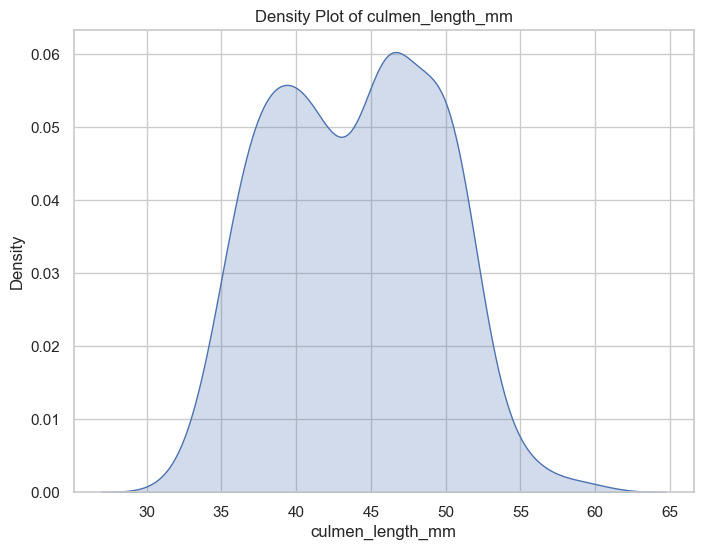

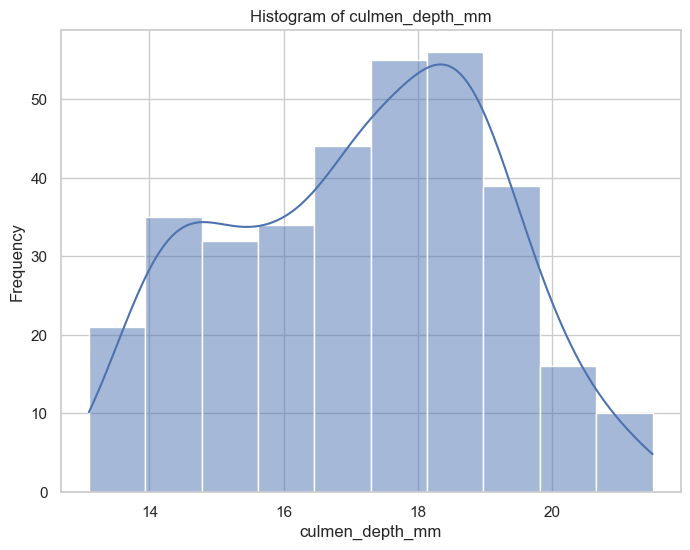

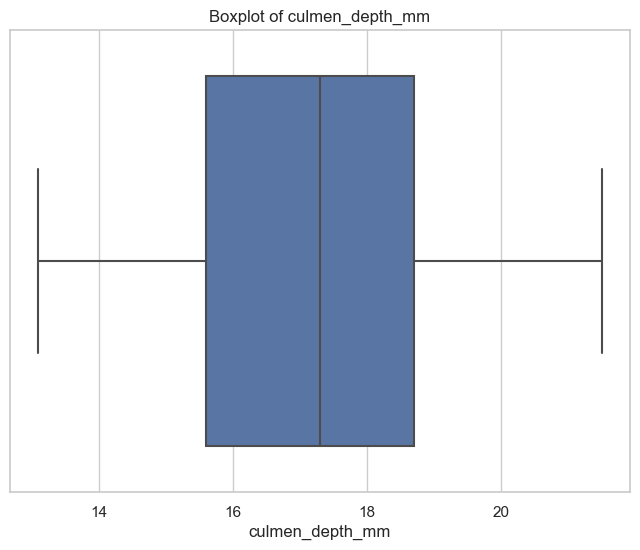

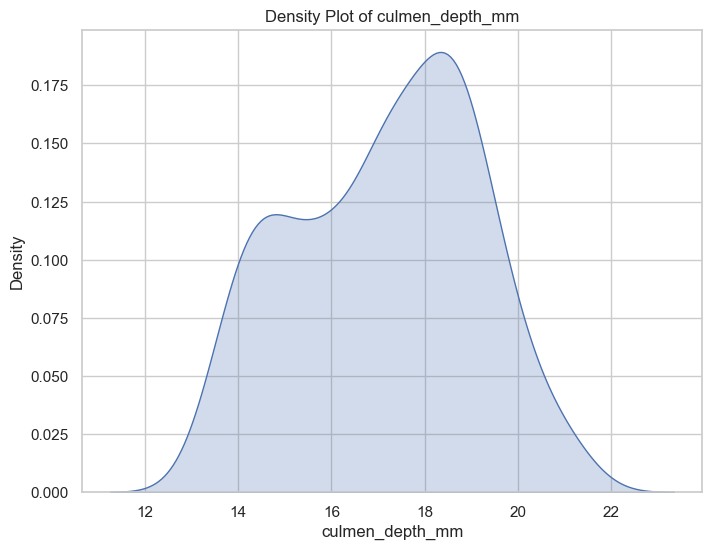

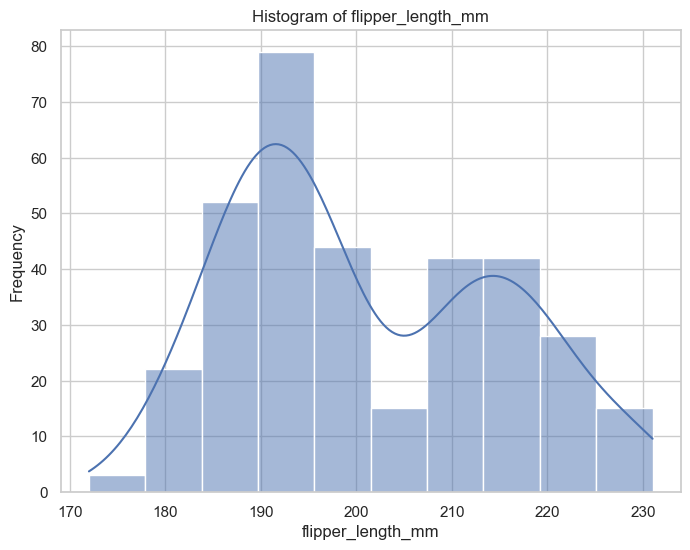

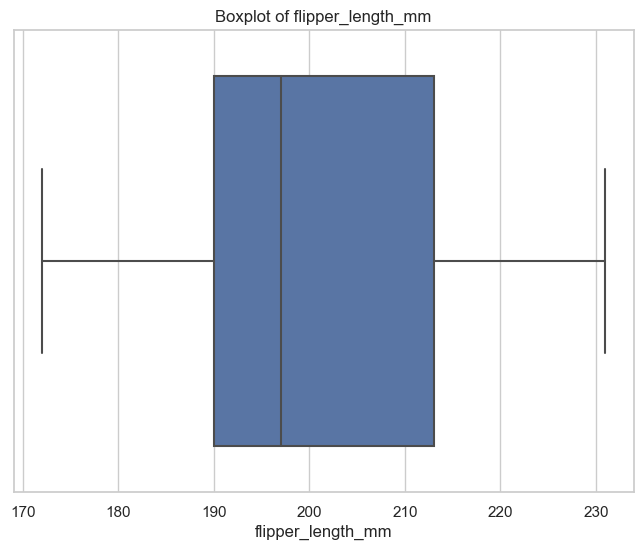

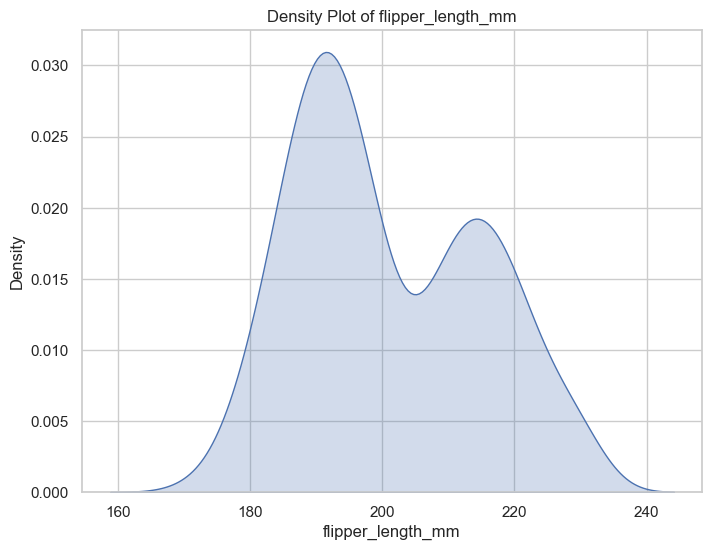

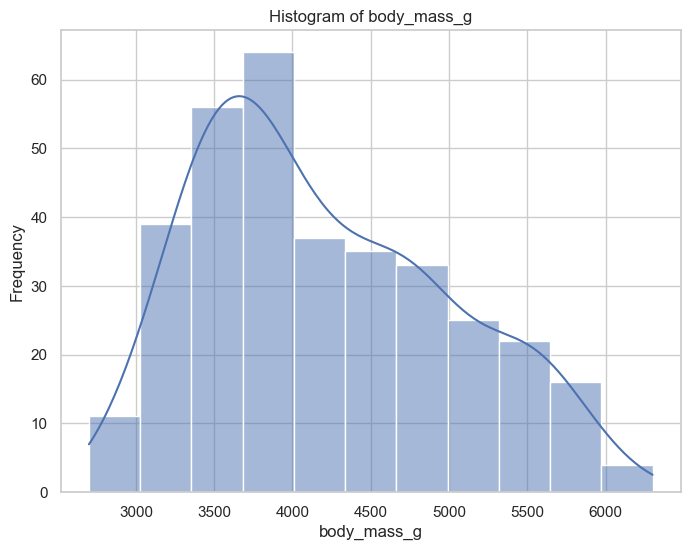

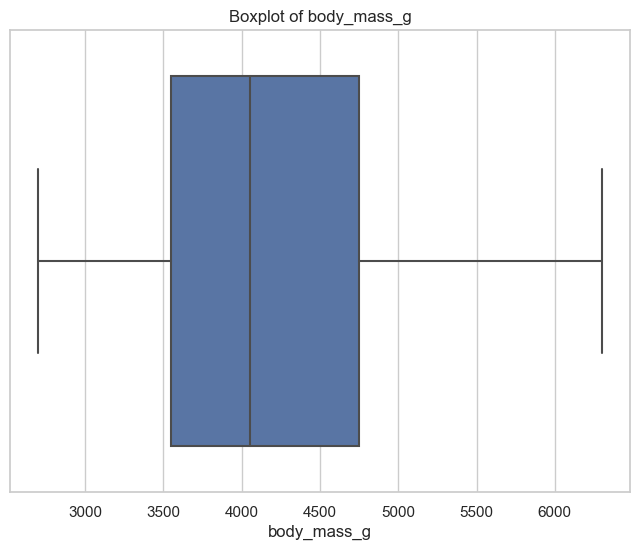

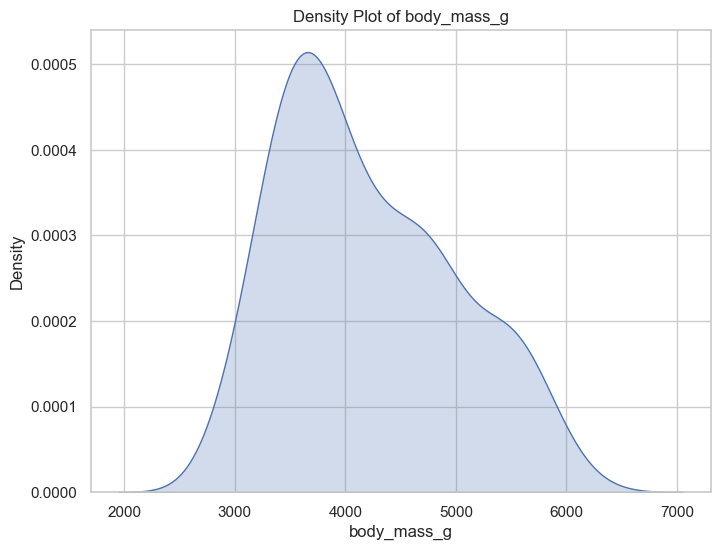

In [4]:
# Univariate Analysis 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Univariate Analysis for Categorical Variables
categorical_variables = ['species', 'island', 'sex']

for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var)
    plt.title(f'Countplot of {var}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate Analysis for Numerical Variables
numerical_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=var, fill=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()


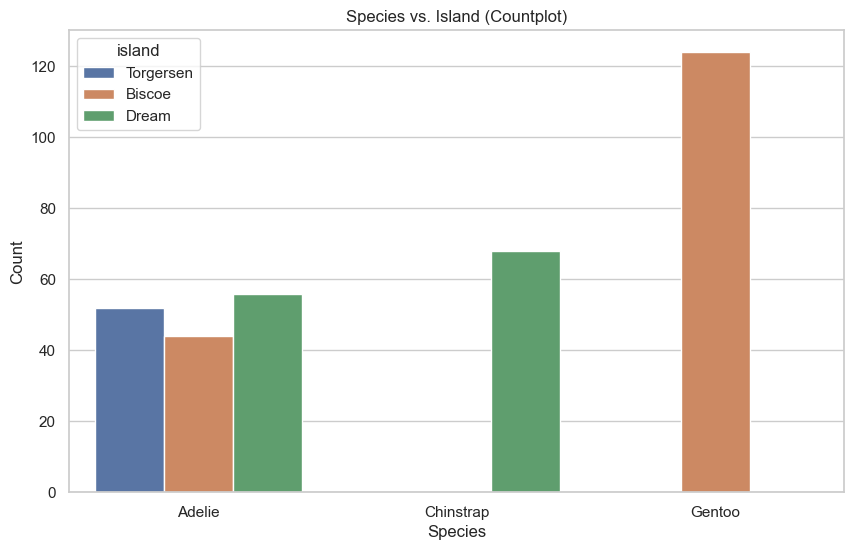

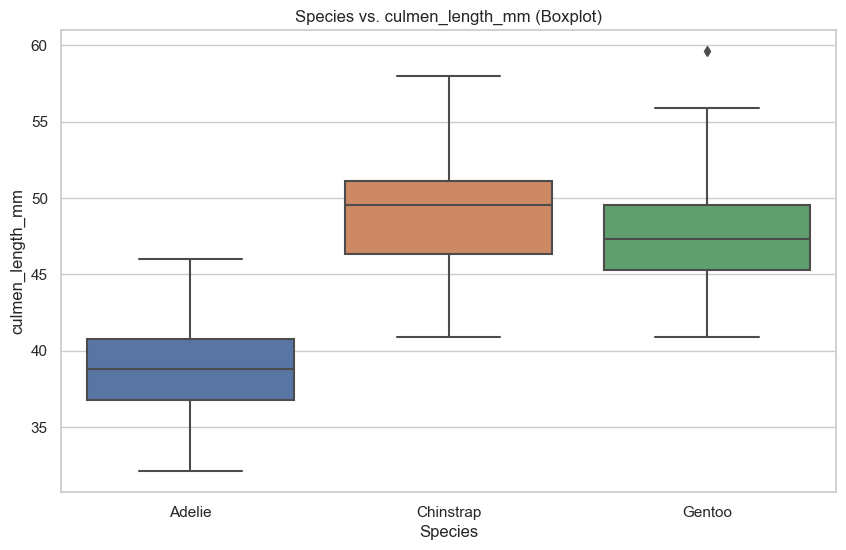

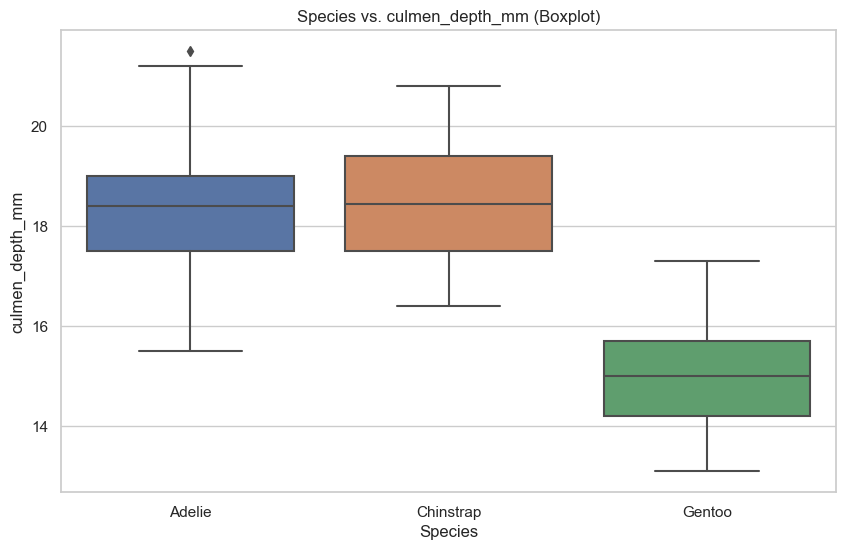

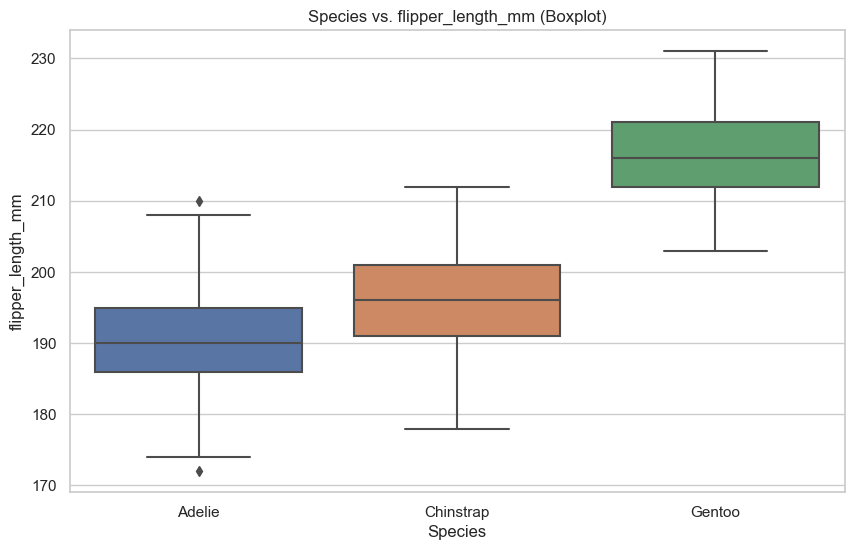

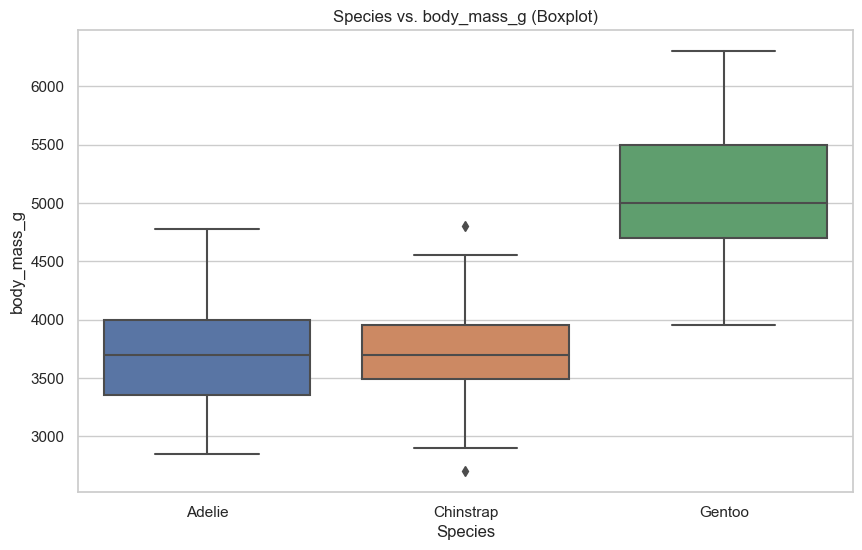

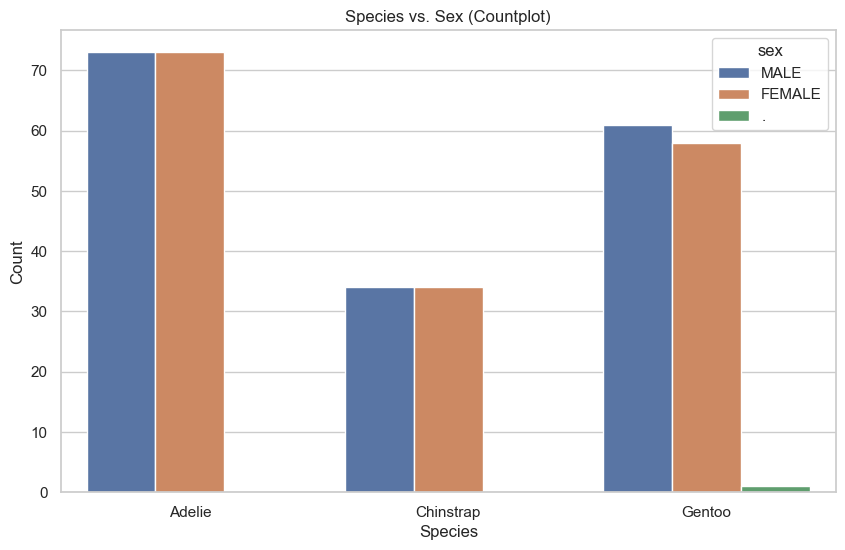

In [5]:
#bivariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Bivariate Analysis: Species vs. Island (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', hue='island')
plt.title('Species vs. Island (Countplot)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis: Species vs. Numerical Attributes (Boxplots)
numerical_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='species', y=var)
    plt.title(f'Species vs. {var} (Boxplot)')
    plt.xlabel('Species')
    plt.ylabel(var)
    plt.show()

# Bivariate Analysis: Species vs. Sex (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', hue='sex')
plt.title('Species vs. Sex (Countplot)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


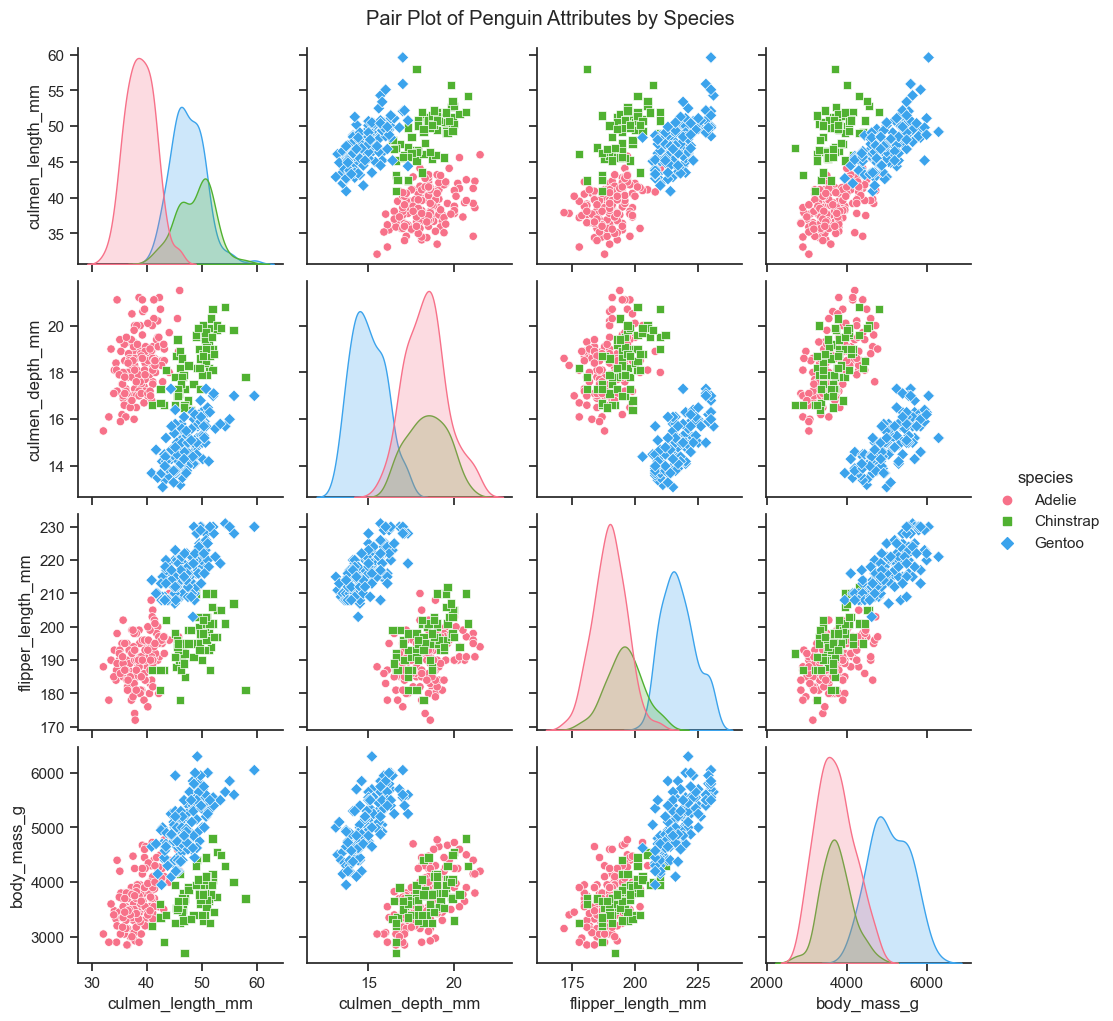

C:\Users\dell\AppData\Local\Temp\ipykernel_5992\2211997196.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


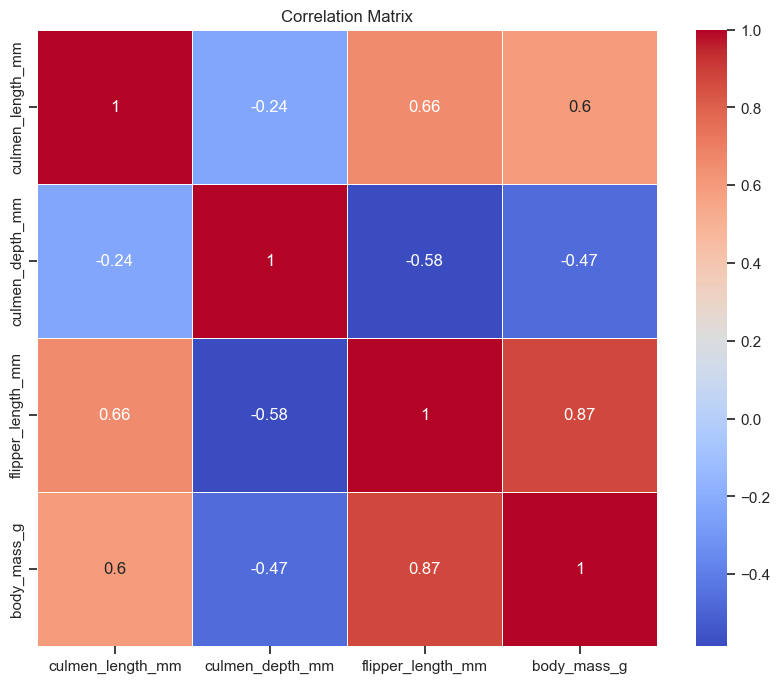

In [6]:
#multivariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Multivariate Analysis: Pair Plot
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="husl")
plt.suptitle("Pair Plot of Penguin Attributes by Species", y=1.02)
plt.show()

# Multivariate Analysis: Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


4. Perform descriptive statistics on the dataset

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5. Check for Missing values and deal with them.

In [16]:
#checking missing values
missing_values = df.isnull().sum()
missing_values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [18]:
#since study is on species
df.dropna(subset=['species'], inplace=True)

#for other missing values:
num_cols_with_missing = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols_with_missing:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values in the 'sex' column with the mode (most frequent value)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Verify that missing values have been handled
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Find the outliers and replace them outliers

In [19]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Define a function to replace outliers with the median of the column
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: np.median(column) if x < lower_bound or x > upper_bound else x)
    return column

# Replace outliers in the selected numerical columns
for col in numerical_columns:
    df[col] = replace_outliers_with_median(df[col])


7.Check the correlation of independent variables with the target

In [22]:
# Define the target variable
target_variable = 'species'

# Convert the 'species' column to numerical labels
df[target_variable] = pd.Categorical(df[target_variable])
df[target_variable] = df[target_variable].cat.codes

# Select numerical independent variables
numerical_independent_vars = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the correlation between each numerical independent variable and the target
correlations = df[numerical_independent_vars].apply(lambda x: x.corr(df[target_variable]))
correlations


culmen_length_mm     0.728674
culmen_depth_mm     -0.741335
flipper_length_mm    0.851160
body_mass_g          0.747726
dtype: float64

8. Check for Categorical columns and perform encoding.

In [23]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,1,0
2,0,40.30000,18.00000,195.000000,3250.000000,0,1,1,0
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,1,0


9. Split the data into dependent and independent variables.

In [25]:
# Define the target variable (dependent variable)
target_variable = 'species'

# Create a DataFrame containing only the independent variables (features)
X = df.drop(columns=[target_variable])

# Create a Series containing the target variable
y = df[target_variable]

X.head()

#y.head()


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [26]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int8

10.Scaling the data

In [30]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the target variable (dependent variable)
target_variable = 'species'

# Create a DataFrame containing only the independent variables (features)
X = df.drop(columns=[target_variable, 'island', 'sex'])  # Exclude non-numeric columns

# Create a Series containing the target variable
y = df[target_variable]

# Apply Min-Max Scaling (Normalization) to the independent variables
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Apply Standardization (Z-score Scaling) to the independent variables
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

# Display the first few rows of the scaled data
print("Min-Max Scaled Data (Normalization):")
print(X_minmax[:5])

print("\nStandardized Data (Z-score Scaling):")
print(X_standard[:5])


Min-Max Scaled Data (Normalization):
[[0.25454545 0.66666667 0.15254237 0.29166667]
 [0.26909091 0.51190476 0.23728814 0.30555556]
 [0.29818182 0.58333333 0.38983051 0.15277778]
 [0.42988836 0.48228209 0.49008821 0.417154  ]
 [0.16727273 0.73809524 0.3559322  0.20833333]]

Standardized Data (Z-score Scaling):
[[-8.87081226e-01  7.87742515e-01 -1.42248782e+00 -5.65789211e-01]
 [-8.13493989e-01  1.26556330e-01 -1.06535169e+00 -5.03167881e-01]
 [-6.66319516e-01  4.31719184e-01 -4.22506659e-01 -1.19200251e+00]
 [-1.30717191e-15  1.80692708e-15  0.00000000e+00  0.00000000e+00]
 [-1.32860464e+00  1.09290537e+00 -5.65361110e-01 -9.41517191e-01]]


11. Split the data into training and testing

In [32]:

from sklearn.model_selection import train_test_split
# Define the target variable (dependent variable)
target_variable = 'species'

# Create a DataFrame containing only the independent variables (features)
X = df.drop(columns=[target_variable, 'island', 'sex'])  # Exclude non-numeric columns

# Create a Series containing the target variable
y = df[target_variable]

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


12.check the training and testing data shape

In [33]:

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (275, 4)
Shape of X_test: (69, 4)
Shape of y_train: (275,)
Shape of y_test: (69,)
